In [1]:
# NOTE: Run this in Python 2.7
import requests
import urllib
import imdb
import lxml.html
import numpy as np
import pandas as pd
import itertools
%matplotlib inline
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [4]:
movies = pd.read_csv('./all_movies_clean.csv').drop(labels=['Unnamed: 0'], axis=1)

In [16]:
# count keywords in data set
keyword_counts = []
for i in range(movies.shape[0]):
    if 'nan' not in str(movies['keywords'][i]):
        count = len(movies['keywords'][i].split(','))
    keyword_counts.append(count)

In [26]:
# find all unique keywords 
keywords = []
for i in range(movies.shape[0]):
    if 'nan' not in str(movies['keywords'][i]):
        keywords = keywords + movies['keywords'][i].split(',')
words, counts = np.unique(keywords, return_counts=True)

In [30]:
# sort by count of keywords in data set 
vals = zip(words, counts)
sorted_vals = sorted(vals, key = lambda t: t[1], reverse=True)

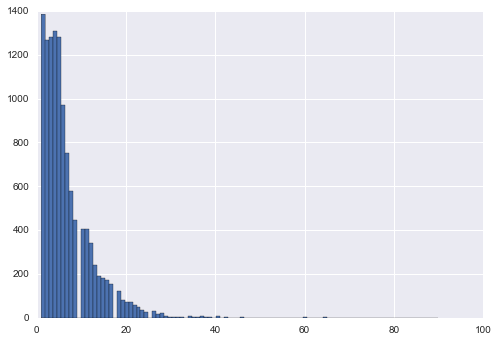

In [22]:
# histogram of number of keywords per movie
plt.hist(keyword_counts, bins=100)
plt.show()

In [82]:
# one hot encoding of keywords 
movies_keywords_df = pd.DataFrame({'keywords': movies['keywords'].values, 'ids': movies['id'].values})
n = movies.shape[0]
for j, w in enumerate(words):
    if (j%100 == 0):
        print(j)
    one_hot_vector = np.zeros((n,1))
    for i in range(movies.shape[0]):
        if 'nan' not in str(movies['keywords'][i]):
            keywords = movies['keywords'][i].split(',')
            if w in keywords:
                one_hot_vector[j] = 1
    movies_keywords_df[w] = one_hot_vector

In [ ]:
movies_keywords_df.head()